# PCA

In [8]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [179]:
df=pd.read_excel('CDO.xlsx',index_col=0)

In [181]:
df

,c23/c24,c25/C26,C27a/b,C28a/b,Ts/Tm,C29/C30,H31S/R,H32S/R,H33S/R,H34S/R,H35S/R
CDO,,,,,,,,,,,
1,1.673350,1.421731,0.890604,0.901817,0.601410,0.723804,1.376419,1.332038,1.436019,1.611112,1.335312
10,1.536986,1.290267,0.791648,0.918477,0.649263,0.683217,1.427221,1.321476,1.404536,1.635225,1.435564
20,1.617945,1.373015,0.808130,0.930890,0.651652,0.723972,1.374033,1.307924,1.550707,1.660347,1.215996
30,1.659285,1.272757,0.797595,0.931940,0.614879,0.737446,1.355900,1.309570,1.445028,1.645815,1.238375
40,1.592129,1.311611,0.775794,1.010011,0.625520,0.733422,1.379409,1.276257,1.516326,1.646814,1.293832
50,1.709101,1.296864,0.790909,0.928723,0.600719,0.723537,1.345179,1.303339,1.482227,1.582450,1.202301
60,1.695518,1.529472,0.910670,0.959855,0.682327,0.766983,1.499794,1.272733,1.522557,1.589040,1.412200


In [241]:
scaled_data=preprocessing.StandardScaler().fit_transform(df.T)
pd.DataFrame(scaled_data)

,0,1,2,3,4,5,6
0,1.332434,1.012134,1.195908,1.386838,1.161540,1.515048,1.267385
1,0.609769,0.291740,0.492831,0.262298,0.338030,0.337597,0.786073
2,-0.915656,-1.164178,-1.128683,-1.120106,-1.234958,-1.107537,-1.007620
3,-0.883450,-0.793850,-0.776299,-0.729251,-0.547372,-0.713906,-0.865050
4,-1.746235,-1.579928,-1.577857,-1.651687,-1.676116,-1.650767,-1.669506
5,-1.394713,-1.480787,-1.370262,-1.295100,-1.359349,-1.299967,-1.424119
6,0.479632,0.691631,0.495752,0.504191,0.537061,0.475595,0.700047
7,0.352165,0.382867,0.305985,0.369400,0.234242,0.356092,0.041876
8,0.650804,0.625394,1.002898,0.763495,0.939007,0.867041,0.766031
9,1.153682,1.298983,1.317623,1.347650,1.322078,1.153302,0.958742


In [242]:
pca=PCA()

In [243]:
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)
pd.DataFrame(pca_data)

,0,1,2,3,4,5,6
0,-3.353936,-0.202795,0.249184,-0.188858,0.124927,0.026963,0.004015
1,-1.178023,0.252131,0.377490,0.111938,-0.084818,-0.035039,0.001061
2,2.902325,0.090015,0.190084,-0.124847,-0.068373,-0.036569,0.005478
3,2.006141,-0.170157,-0.129767,0.105531,0.116181,-0.086437,-0.014697
4,4.366456,-0.029866,-0.070214,0.048310,-0.035647,0.097414,-0.001329
5,3.637022,-0.158995,0.041126,-0.033003,0.037308,-0.016803,0.032409
6,-1.466970,0.206172,-0.045723,0.074469,0.061522,0.079717,0.028036
7,-0.772495,-0.115780,-0.159363,-0.192442,-0.092068,0.012405,-0.053857
8,-2.122898,-0.237893,0.047379,0.236675,-0.017480,0.016204,-0.039620
9,-3.233006,-0.164070,-0.271214,0.003448,-0.103669,-0.032668,0.056421


In [223]:
pca.explained_variance_ratio_

array([9.83142728e-01, 7.65664760e-03, 5.45331981e-03, 2.32012424e-03,
       9.19597173e-04, 3.76725629e-04, 1.30857715e-04])

In [224]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC' + str(x) for x in range(1,len(per_var)+1)] 
per_var

array([98.3,  0.8,  0.5,  0.2,  0.1,  0. ,  0. ])

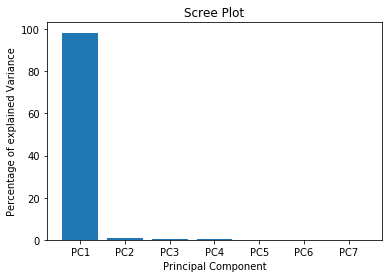

In [225]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [226]:
df.index

Int64Index([1, 10, 20, 30, 40, 50, 60], dtype='int64', name='CDO')

In [227]:
pca_df=pd.DataFrame(pca_data, index=df.columns, columns=labels)

In [228]:
pca_df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], dtype='object')

In [229]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
c23/c24,-3.353936,-0.202795,0.249184,-0.188858,0.124927,0.026963,0.004015
c25/C26,-1.178023,0.252131,0.377490,0.111938,-0.084818,-0.035039,0.001061
C27a/b,2.902325,0.090015,0.190084,-0.124847,-0.068373,-0.036569,0.005478
C28a/b,2.006141,-0.170157,-0.129767,0.105531,0.116181,-0.086437,-0.014697
Ts/Tm,4.366456,-0.029866,-0.070214,0.048310,-0.035647,0.097414,-0.001329
C29/C30,3.637022,-0.158995,0.041126,-0.033003,0.037308,-0.016803,0.032409
H31S/R,-1.466970,0.206172,-0.045723,0.074469,0.061522,0.079717,0.028036
H32S/R,-0.772495,-0.115780,-0.159363,-0.192442,-0.092068,0.012405,-0.053857
H33S/R,-2.122898,-0.237893,0.047379,0.236675,-0.017480,0.016204,-0.039620
H34S/R,-3.233006,-0.164070,-0.271214,0.003448,-0.103669,-0.032668,0.056421


In [230]:
pca_df.index

Index(['c23/c24', 'c25/C26', 'C27a/b', 'C28a/b', 'Ts/Tm', 'C29/C30', 'H31S/R',
       'H32S/R', 'H33S/R', 'H34S/R', 'H35S/R'],
      dtype='object')

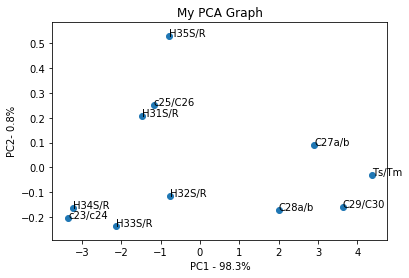

In [231]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2- {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

In [232]:
loading_scores = pd.Series(pca.components_[1], index=df.index)
sorted_loading_scores=loading_scores.abs().sort_values(ascending=False)
top10=sorted_loading_scores[0:10].index.values
print(top10)
print(loading_scores[top10])

[60 10 50 30 20  1 40]
CDO
60    0.527359
10    0.505354
50   -0.419218
30   -0.325598
20   -0.319556
1     0.222917
40   -0.181504
dtype: float64


# ML

In [265]:
Terpanes=pd.read_excel('CDO.xlsx')
Terpanes.rename(columns={'type of oil':'type_oil'}, inplace=True)
Terpanes

,time,c23/c24,c25/C26,C27a/b,C28a/b,Ts/Tm,C29/C30,H31S/R,H32S/R,H33S/R,H34S/R,H35S/R,type_oil
0,1,1.673350,1.421731,0.890604,0.901817,0.601410,0.723804,1.376419,1.332038,1.436019,1.611112,1.335312,CDO
1,10,1.536986,1.290267,0.791648,0.918477,0.649263,0.683217,1.427221,1.321476,1.404536,1.635225,1.435564,CDO
2,20,1.617945,1.373015,0.808130,0.930890,0.651652,0.723972,1.374033,1.307924,1.550707,1.660347,1.215996,CDO
3,30,1.659285,1.272757,0.797595,0.931940,0.614879,0.737446,1.355900,1.309570,1.445028,1.645815,1.238375,CDO
4,40,1.592129,1.311611,0.775794,1.010011,0.625520,0.733422,1.379409,1.276257,1.516326,1.646814,1.293832,CDO
5,50,1.709101,1.296864,0.790909,0.928723,0.600719,0.723537,1.345179,1.303339,1.482227,1.582450,1.202301,CDO
6,60,1.695518,1.529472,0.910670,0.959855,0.682327,0.766983,1.499794,1.272733,1.522557,1.589040,1.412200,CDO
7,1,1.655760,1.348803,0.883715,0.888819,0.586096,0.708240,1.354741,1.321276,1.415890,1.534081,1.219222,WCO
8,10,1.614391,1.301180,0.966819,0.928189,0.629228,0.733907,1.376624,1.274657,1.501737,1.614884,1.331418,WCO
9,20,1.685309,1.331517,0.938715,0.904548,0.644020,0.744872,1.546374,1.261536,1.552008,1.642434,1.341832,WCO


In [266]:
import matplotlib.pyplot as plt

In [267]:
Terpanes.columns

Index(['time', 'c23/c24', 'c25/C26', 'C27a/b', 'C28a/b', 'Ts/Tm', 'C29/C30',
       'H31S/R', 'H32S/R', 'H33S/R', 'H34S/R', 'H35S/R', 'type_oil'],
      dtype='object')

In [274]:
inputs=Terpanes.drop(['type_oil','time'], axis=1)

In [294]:
df.columns

Index(['C23', 'C24', 'C25', 'C26', 'C27a', 'C27b', 'C28a', 'C28b', 'Ts', 'Tm',
       'C29', 'C30', 'H31S', 'H31R', 'H32S', 'H32R', 'H33S', 'H33R', 'H34S',
       'H34R', 'H35S', 'H35R', 'type_oil'],
      dtype='object')

In [283]:
df=pd.read_excel('CDO.xlsx', sheet_name='Sheet3')
df.drop('type_oil',axis=1)

,C23,C24,C25,C26,C27a,C27b,C28a,C28b,Ts,Tm,...,H31S,H31R,H32S,H32R,H33S,H33R,H34S,H34R,H35S,H35R
0,29090,18389,17663,13070,7486.0,8069.0,8879,9857,15449,23890,...,32667,23528,24105,15466,15904,12156,10453,7620,10160,7092
1,31236,19805,19803,13282,7555.0,8695.0,10573,11278,17731,28448,...,35195,24367,25691,20345,17428,11451,11283,6554,10304,6867
2,12809,7748,6658,5235,2484.0,2958.0,2864,3295,4467,7640,...,9723,7223,7006,5202,5482,3965,4356,2426,4079,3203
3,12719,7377,6936,4816,2548.0,2133.0,2948,3375,4657,7955,...,10665,7682,7479,5738,5636,4109,4318,2459,3980,3234
4,11892,6401,6630,4206,2275.0,2751.0,2779,3079,4113,7309,...,10607,8164,7153,5579,5534,4001,3842,2576,4263,3425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,57125,34575,32497,24514,11948.0,14634.0,15863,16107,26565,43026,...,60980,46534,43984,33401,34565,25806,25878,16959,26303,21483
104,62090,38538,36428,27907,13266.0,16561.0,16727,17646,28984,46274,...,63919,48712,45867,34515,36686,24124,27492,17615,28033,22810
105,6684,4209,3690,2853,1293.0,1573.0,1695,1889,2629,4753,...,6610,4648,4894,3619,3600,2577,2734,1803,2883,2316
106,6324,3489,3570,2731,1274.0,1507.0,1573,1955,2669,4478,...,6799,4896,5341,3950,3986,2700,2666,1897,2961,2199


In [303]:
from sklearn.preprocessing import LabelEncoder

In [377]:

    for i in range(len(df.columns)):
        ratio=int(df[df.columns[0]])/int(df[df.columns[i]])
        
      
      

TypeError: cannot convert the series to <class 'int'>

In [374]:
df[df.columns[0]]

0      29090
1      31236
2      12809
3      12719
4      11892
       ...  
103    57125
104    62090
105     6684
106     6324
107     6117
Name: C23, Length: 108, dtype: int64

In [375]:
df[df.columns[1]]

0      18389
1      19805
2       7748
3       7377
4       6401
       ...  
103    34575
104    38538
105     4209
106     3489
107     3601
Name: C24, Length: 108, dtype: int64

In [387]:

ratio=[]
ratio=df[df.columns[0]]/df[df.columns[1]]
ratio.append(ratio)
ratio=df[df.columns[0]]/df[df.columns[2]]
ratio.append(ratio)
ratio

0      1.646946
1      1.577337
2      1.923851
3      1.833766
4      1.793665
         ...   
103    1.757855
104    1.704458
105    1.811382
106    1.771429
107    1.748214
Length: 108, dtype: float64

In [388]:
ratio

0      1.646946
1      1.577337
2      1.923851
3      1.833766
4      1.793665
         ...   
103    1.757855
104    1.704458
105    1.811382
106    1.771429
107    1.748214
Length: 108, dtype: float64

In [365]:
diagnostic_ratio(['C23', 'C24', 'C25', 'C26', 'C27a', 'C27b', 'C28a', 'C28b', 'Ts', 'Tm',
       'C29', 'C30', 'H31S', 'H31R', 'H32S', 'H32R', 'H33S', 'H33R', 'H34S',
       'H34R', 'H35S', 'H35R'])


0      4.101805
1      4.548711
2      3.999063
3      3.932900
4      3.472117
         ...   
103    2.659079
104    2.722052
105    2.886010
106    2.875853
107    3.174364
Length: 108, dtype: float64

In [364]:
ratio

0      4.101805
1      4.548711
2      3.999063
3      3.932900
4      3.472117
         ...   
103    2.659079
104    2.722052
105    2.886010
106    2.875853
107    3.174364
Length: 108, dtype: float64